In [2]:
import re 
from dataclasses import dataclass
from aocd import get_data, submit
from collections import defaultdict 
import networkx as nx

@dataclass
class Valve:
    valve: str
    rate: int
    neighbours: list
        
data = """Valve AA has flow rate=0; tunnels lead to valves DD, II, BB
Valve BB has flow rate=13; tunnels lead to valves CC, AA
Valve CC has flow rate=2; tunnels lead to valves DD, BB
Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE
Valve EE has flow rate=3; tunnels lead to valves FF, DD
Valve FF has flow rate=0; tunnels lead to valves EE, GG
Valve GG has flow rate=0; tunnels lead to valves FF, HH
Valve HH has flow rate=22; tunnel leads to valve GG
Valve II has flow rate=0; tunnels lead to valves AA, JJ
Valve JJ has flow rate=21; tunnel leads to valve II"""
   
# data = get_data(year=2022, day=16)

data=data.splitlines()

nodes = []
for line in data:
    node = re.findall("Valve ([A-Z]*) ", line)[0]
    rate = int(re.findall("rate=([\d]*);", line)[0])
    neighbours = [n[1:].strip() for n in line.split("valve")[1].split(",")]
    nodes.append(Valve(node, rate, neighbours))
nodes

[Valve(valve='AA', rate=0, neighbours=['DD', 'II', 'BB']),
 Valve(valve='BB', rate=13, neighbours=['CC', 'AA']),
 Valve(valve='CC', rate=2, neighbours=['DD', 'BB']),
 Valve(valve='DD', rate=20, neighbours=['CC', 'AA', 'EE']),
 Valve(valve='EE', rate=3, neighbours=['FF', 'DD']),
 Valve(valve='FF', rate=0, neighbours=['EE', 'GG']),
 Valve(valve='GG', rate=0, neighbours=['FF', 'HH']),
 Valve(valve='HH', rate=22, neighbours=['GG']),
 Valve(valve='II', rate=0, neighbours=['AA', 'JJ']),
 Valve(valve='JJ', rate=21, neighbours=['II'])]

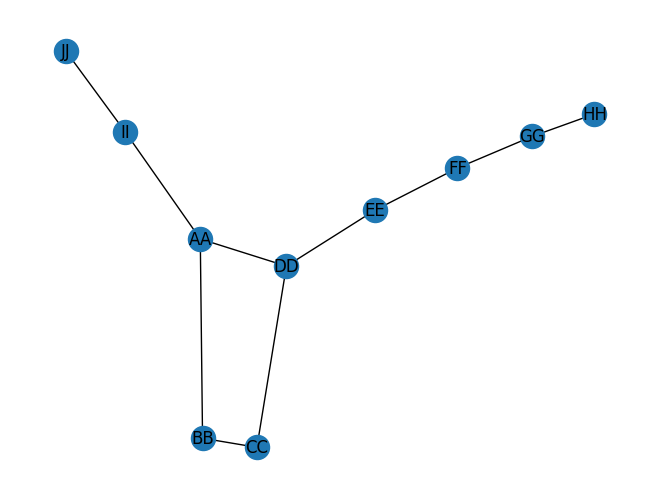

In [3]:
g = defaultdict()
for node in nodes:
    g[node.valve] = {neigh: {} for neigh in node.neighbours}
g = dict(g)
G = nx.from_dict_of_dicts(g)
nx.draw(G, with_labels=True)

In [4]:
simple_dict = {node.valve:node.neighbours for node in nodes}
useful_nodes = [node.valve for node in nodes if node.rate > 0]
flowrate = {node.valve:node.rate for node in nodes}

In [5]:
best_paths = defaultdict(dict)
best_paths["AA"] = {"": 0}
DEBUG = False
open_valves_flowrate = {}

print_debug = lambda s: print(s) if DEBUG else None

# iterate until it converges. Just put some high enough number
for i in range(30):
    print_debug(f"*** ROUND {i} ***")
    new_best_paths = best_paths.copy()
    # for each node, check all possible ordered combinations of open valves to get to that node
    for node, options in best_paths.items():
        print_debug(f"Visiting {node}")
        # open_valves is an ordered combination of opened valves, best_stepcount is 
        # minimal stepcount to open those valves and get to the current node
        for open_valves, best_stepcount in options.items():
            neighbours = simple_dict[node]
            for neigh in neighbours:
                print_debug(f"{i}, best_stepcount: {best_stepcount}, Open valves: {open_valves}, Neighbour: {neigh}")
                # check if we're actually making an improvement here, same order but fewer steps
                if (open_valves in new_best_paths[neigh]) and (new_best_paths[neigh][open_valves] <= best_stepcount):
                    continue
                # traveling to the next valve takes one time unit
                new_best_paths[neigh][open_valves] = best_stepcount+1
        # for all combinations, add opening current valve as an option
        for open_valves in list(options.keys()):
            # if we haven't opened the valve yet, open it and add it to the list of possibilities
            if (node in useful_nodes) and (node not in open_valves):
                new_open_valves = open_valves + node
                print_debug("> Opening valve")
                new_best_paths[node][new_open_valves] = new_best_paths[node][open_valves]+1
    best_paths = new_best_paths

In [121]:
# Test v
test = "DDBBJJHHEECC"
best_paths[test[-2:]][test]

24

In [125]:
# possible_paths = defaultdict(int)
# possible_paths["AA"] = 1
# for i in range(30):
#     new_paths = defaultdict(int)
#     for key, neighbours in simple_dict.items():
#         n_paths = possible_paths[key]
#         # stay in same spot
#         if 
#         new_paths[key] += n_paths
#         # move to other location
#         for neigh in neighbours:
#             new_paths[neigh] += n_paths
#     possible_paths = new_paths.copy()
# possible_paths

In [ ]:

# def explore_graph(node, visited, opened, count, flow):
#     neighbors = simple_dict[node]
#     if (flowrate[node] > 0) and (node not in opened):
#         flow += flowrate[node]*(count-1)
#         return explore_graph(node, visited, opened, count, flow)
#     for node in neighbors:
#         if node in visited:
        
    
# explore_graph("AA", set(), set, 5, 0)